# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

# Read Data

In [2]:
data = pd.read_csv('data_car.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


### Data Visualization

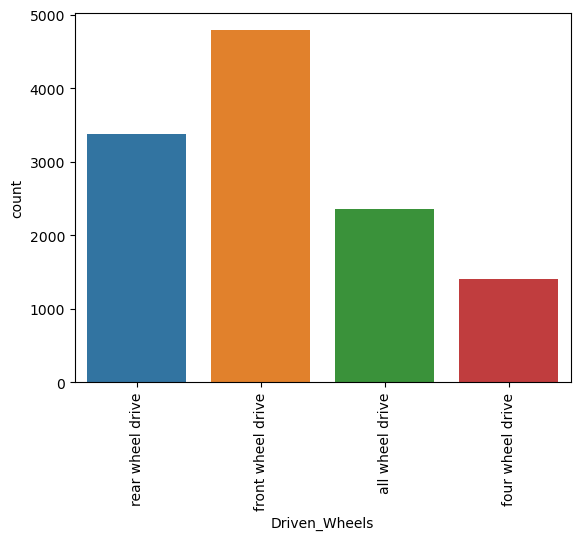

In [7]:
sns.countplot(data=data,x='Driven_Wheels')
plt.xticks(rotation=90)
plt.show()

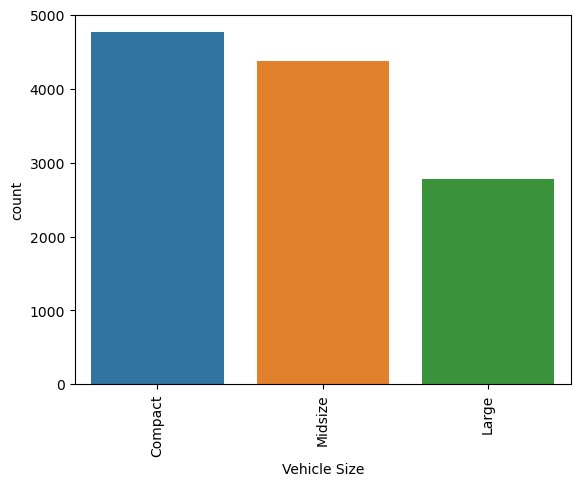

In [8]:
sns.countplot(data=data,x='Vehicle Size')
plt.xticks(rotation=90)
plt.show()

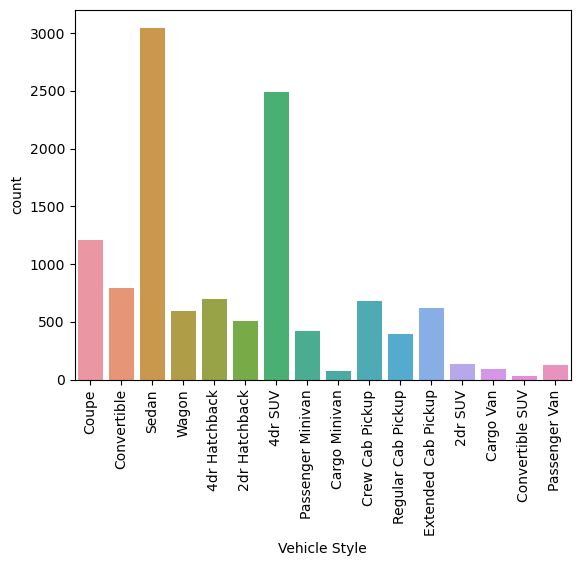

In [9]:
sns.countplot(data=data,x='Vehicle Style')
plt.xticks(rotation=90)
plt.show()

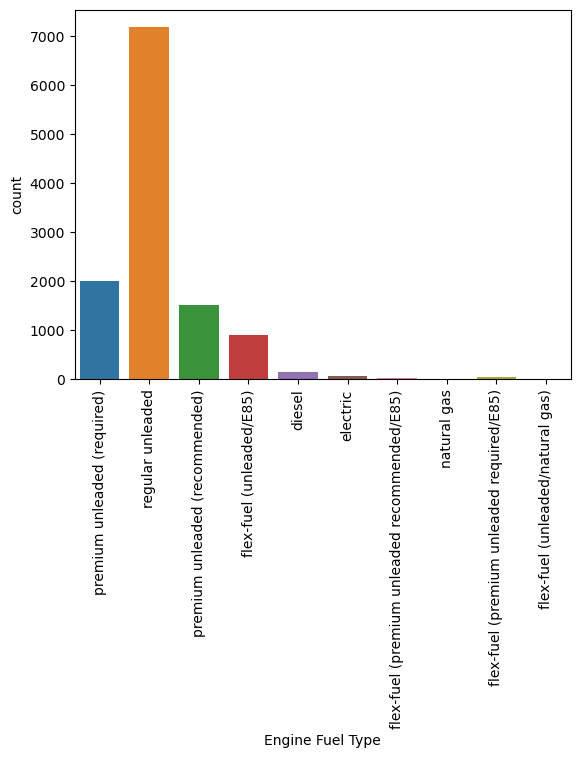

In [10]:
sns.countplot(data=data,x='Engine Fuel Type')
plt.xticks(rotation=90)
plt.show()

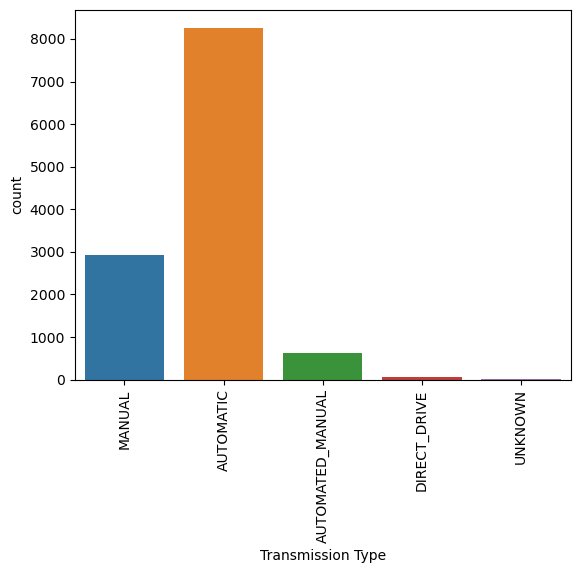

In [11]:
sns.countplot(data=data,x='Transmission Type')
plt.xticks(rotation=90)
plt.show()

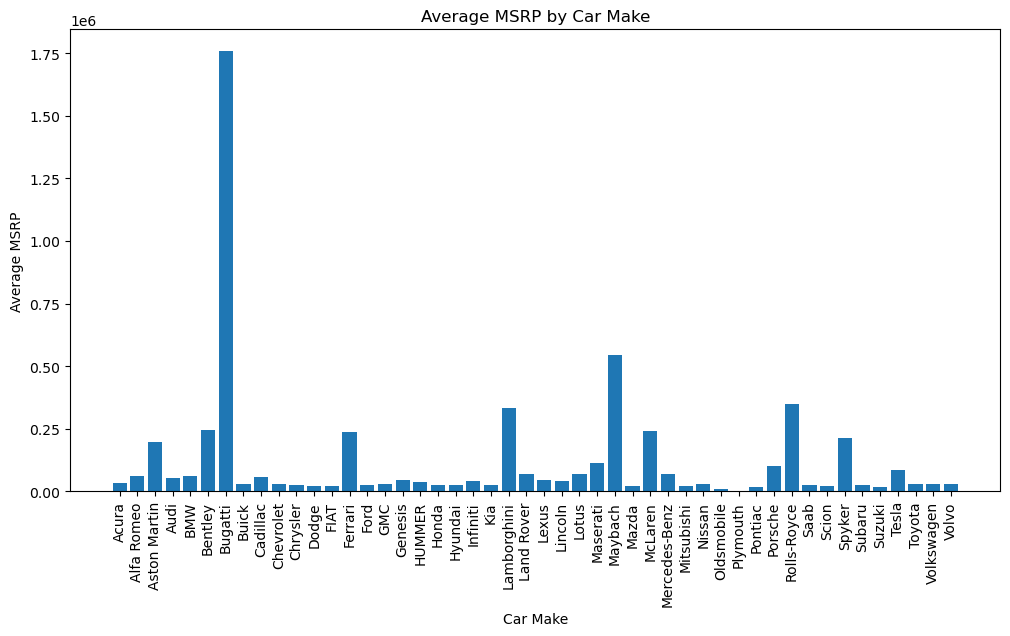

In [12]:
average_msrp_by_make = data.groupby('Make')['MSRP'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_msrp_by_make['Make'], average_msrp_by_make['MSRP'])
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average MSRP')
plt.title('Average MSRP by Car Make')
plt.show()

 - The barplot shows that Buggatti has the highest average MSRP compared to other car makers.

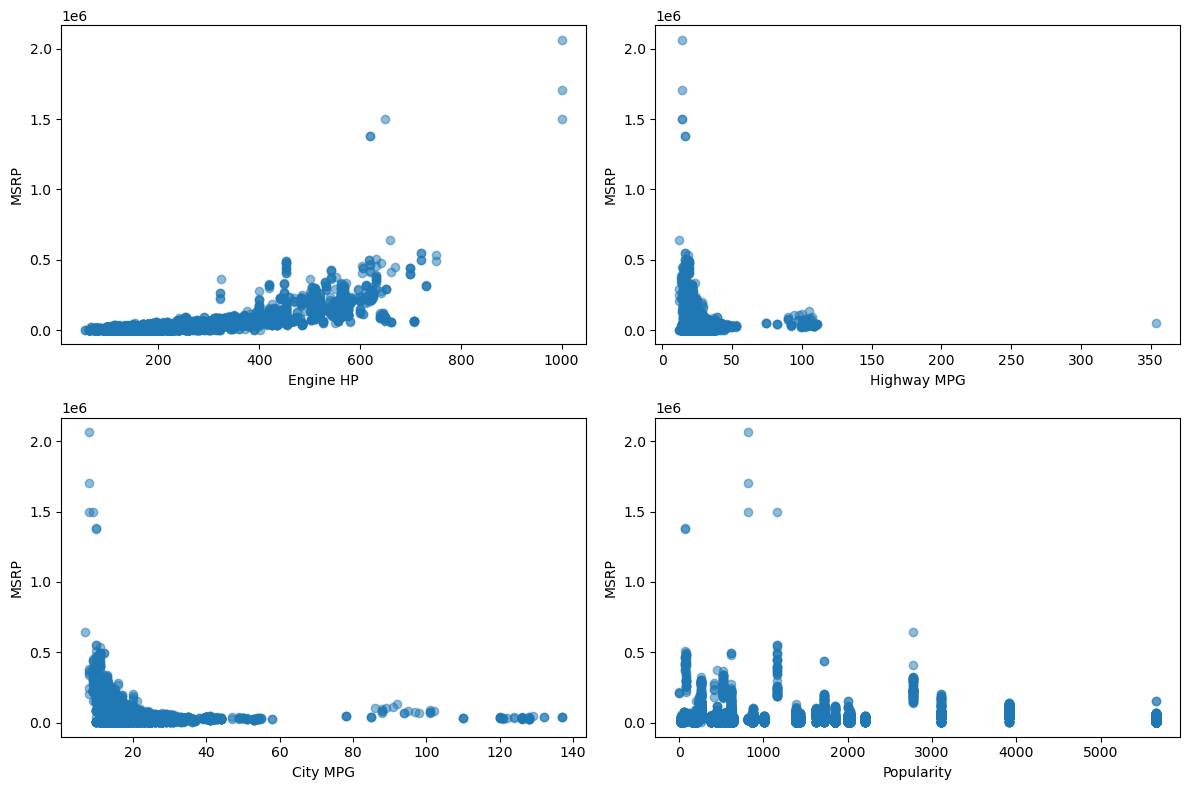

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['Engine HP'], data['MSRP'], alpha=0.5)
plt.xlabel('Engine HP')
plt.ylabel('MSRP')

plt.subplot(2, 2, 2)
plt.scatter(data['highway MPG'], data['MSRP'], alpha=0.5)
plt.xlabel('Highway MPG')
plt.ylabel('MSRP')

plt.subplot(2, 2, 3)
plt.scatter(data['city mpg'], data['MSRP'], alpha=0.5)
plt.xlabel('City MPG')
plt.ylabel('MSRP')

plt.subplot(2, 2, 4)
plt.scatter(data['Popularity'], data['MSRP'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('MSRP')

plt.tight_layout()
plt.show()


<AxesSubplot:>

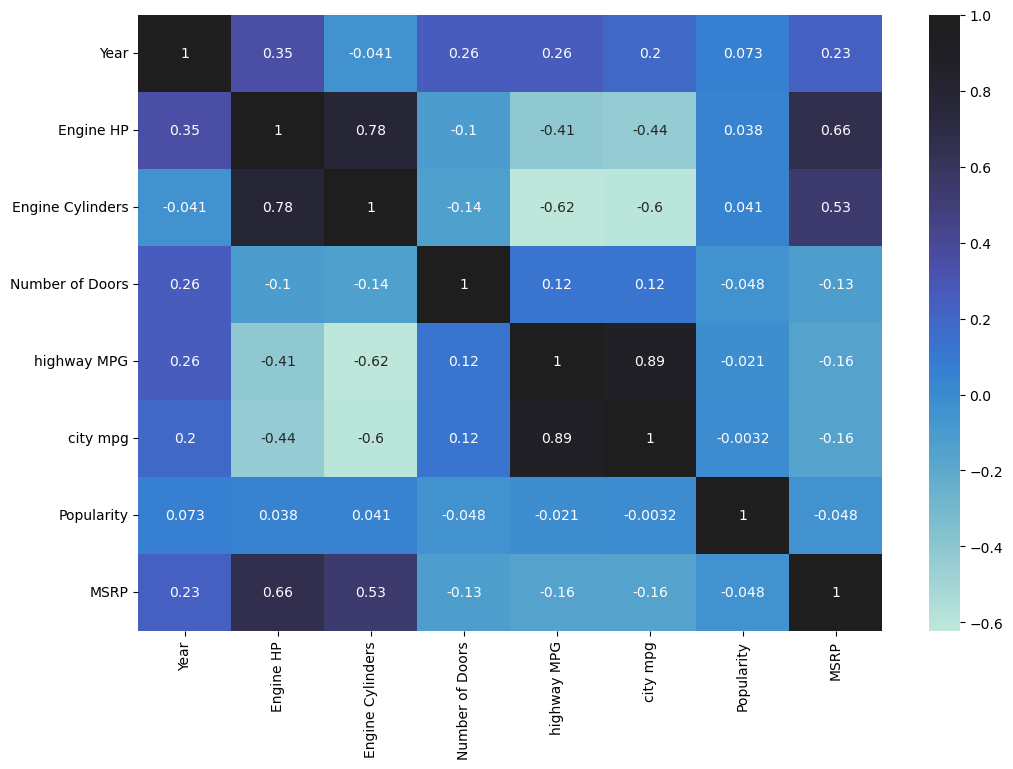

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=True, center=True)

 - There is a moderate positive correlation between Engine HP and MSRP(0.66), which suggests that cars with higher horsepower engines generally have higher price.
 - There is a very high positive correlation between city mpg and highway MPG(0.89), this inidicates that vehicles that are more fuel efficient in city driving conditions also tend to be more fuel efficient on the highway.
 - Also have a high positive correlation between Engine HP and Engine Cylinders(0.78), which indicates that htere is a predictable and proportiona; relationship between these variables, where an increase in Engine HP is often associated with an increase in the number of Engine Cylinders.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Engine HP'}>,
        <AxesSubplot:title={'center':'Engine Cylinders'}>],
       [<AxesSubplot:title={'center':'Number of Doors'}>,
        <AxesSubplot:title={'center':'highway MPG'}>,
        <AxesSubplot:title={'center':'city mpg'}>],
       [<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'MSRP'}>, <AxesSubplot:>]],
      dtype=object)

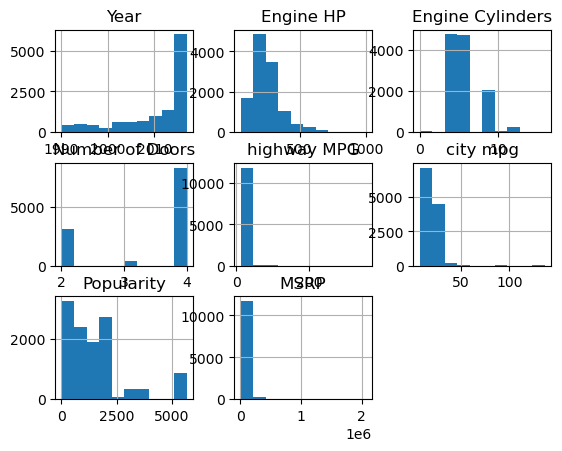

In [15]:
data.hist()

# Preprocessing

## Null Values

In [16]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [17]:
series = data.isna().sum()
missing_total = series[series.values > 0]

series1 = round(data.isna().mean() * 100, 3)
missing_percentage = series1[series1.values > 0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_Total', 'Missing_Percentage'])
df

,Missing_Total,Missing_Percentage
Engine Fuel Type,3,0.025
Engine HP,69,0.579
Engine Cylinders,30,0.252
Number of Doors,6,0.050
Market Category,3742,31.408


### Removing Null Values

In [18]:
data['Market Category'].fillna(data['Market Category'].mode()[0], inplace=True)

- Replacing the missing values in Market Category to mode of the column, that is with 'Crossover'

In [19]:
data = data.dropna(how='any')
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

 - Since the missing percentage is low in Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors, we can drop these missing values from the data.

## Outliers

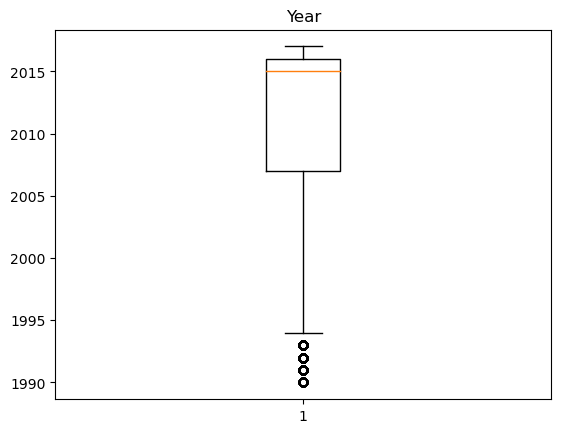

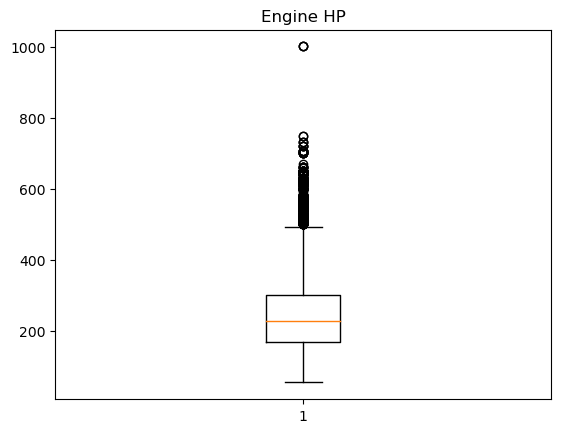

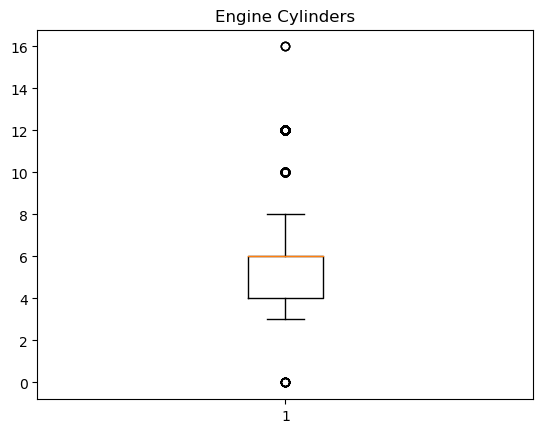

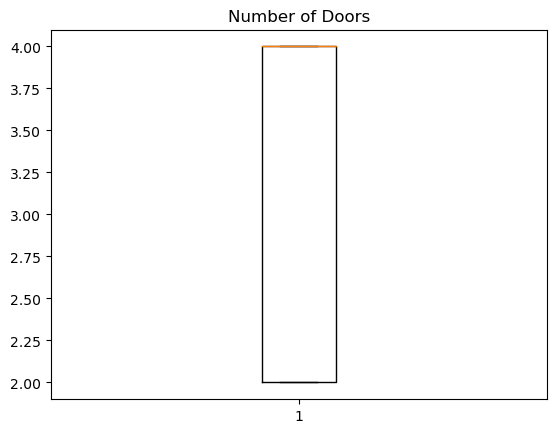

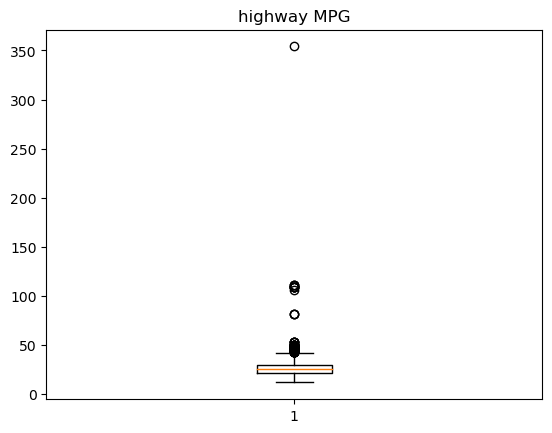

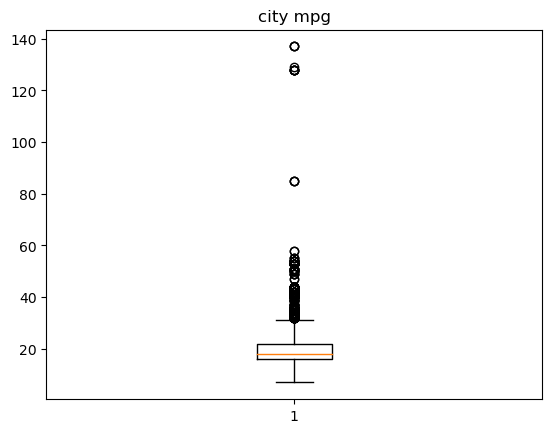

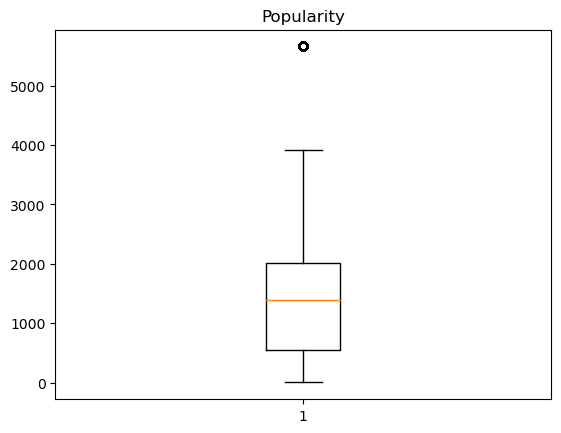

In [20]:
for i in ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

 - Outliers are present in 'Year','Engine HP','Engine Cylinders','highway MPG','city mpg' in these columns

### Treating Outliers

In [21]:
for i in [ 'Year','Engine HP','Engine Cylinders','highway MPG','city mpg' ]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

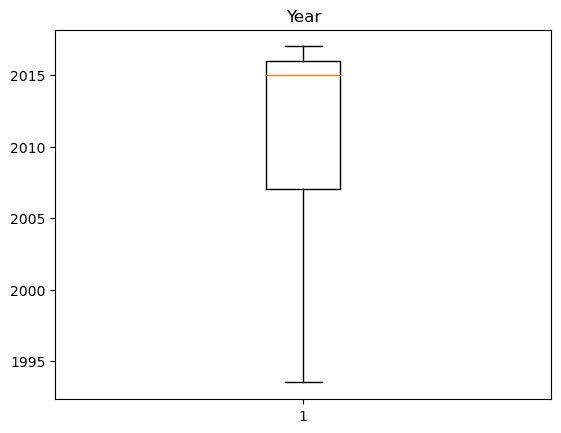

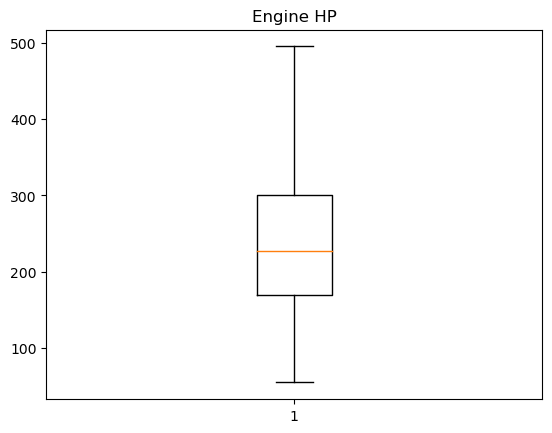

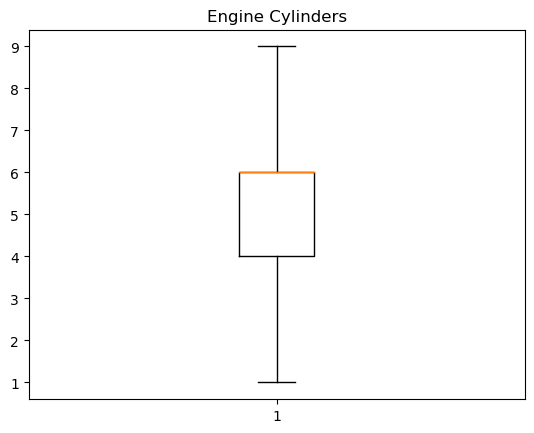

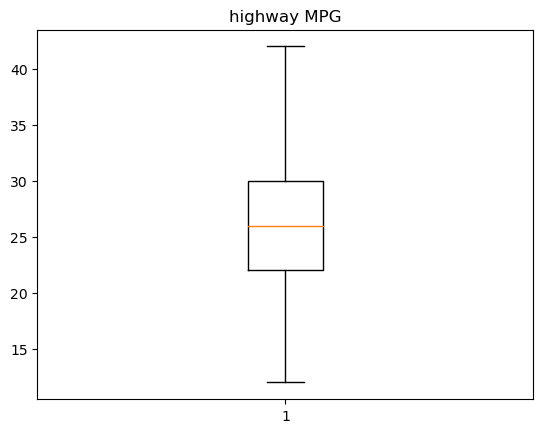

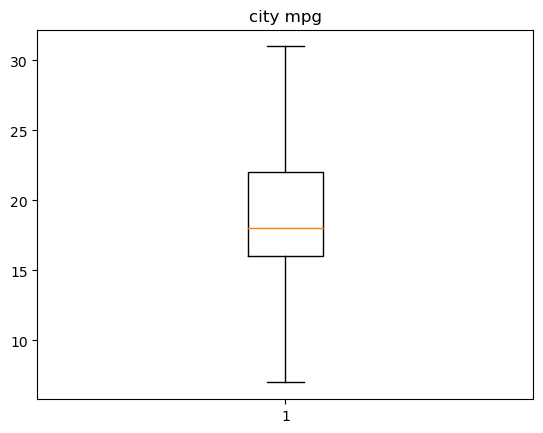

In [22]:
for i in [ 'Year','Engine HP','Engine Cylinders','highway MPG','city mpg' ]:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

## Encoding

In [23]:
le = LabelEncoder()
data['Model'] = le.fit_transform(data['Model'])
data['Market Category'] = le.fit_transform(data['Market Category'])

In [24]:
df = pd.get_dummies(data[['Make','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style','Model','Year','Engine HP','Engine Cylinders','Number of Doors','Market Category','highway MPG','city mpg','city mpg']], drop_first = True)

In [25]:
data = pd.concat([data[['Model','Year','Engine HP','Engine Cylinders','Number of Doors','Market Category','highway MPG','city mpg','city mpg','MSRP']],df],axis=1)

In [26]:
data.head()

,Model,Year,Engine HP,Engine Cylinders,Number of Doors,Market Category,highway MPG,city mpg,city mpg,MSRP,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,1,2011.0,335.0,6.0,2.0,37,26,19,19,46135,...,0,0,1,0,0,0,0,0,0,0
1,0,2011.0,300.0,6.0,2.0,66,28,19,19,40650,...,1,0,0,0,0,0,0,0,0,0
2,0,2011.0,300.0,6.0,2.0,63,28,20,20,36350,...,0,0,1,0,0,0,0,0,0,0
3,0,2011.0,230.0,6.0,2.0,66,28,18,18,29450,...,0,0,1,0,0,0,0,0,0,0
4,0,2011.0,230.0,6.0,2.0,62,28,18,18,34500,...,1,0,0,0,0,0,0,0,0,0


In [27]:
data.shape

(11812, 88)

# Modeling

In [28]:
X = data.drop(['MSRP'],axis=1)
y = data['MSRP']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8859, 87)
(2953, 87)
(8859,)
(2953,)


In [ ]:
model1 = LogisticRegression().fit(X_train,y_train)
model2 = DecisionTreeClassifier().fit(X_train,y_train)
model3 = AdaBoostClassifier().fit(X_train,y_train)
model4 = GradientBoostingClassifier().fit(X_train,y_train)
model5 = BaggingClassifier().fit(X_train,y_train)
model6 = RandomForestClassifier().fit(X_train,y_train)
model7 = XGBClassifier().fit(X_train,y_train)

C:\Users\Farhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)

In [ ]:
print('logistic_regression: ', accuracy_score(y_test,y_pred1))
print('decision_tree: ', accuracy_score(y_test,y_pred2))
print('Adaboost: ', accuracy_score(y_test,y_pred3))
print('GradientBoost: ', accuracy_score(y_test,y_pred4))
print('Bagging: ', accuracy_score(y_test,y_pred5))
print('random_forest: ', accuracy_score(y_test,y_pred6))
print('XG_Boost: ', accuracy_score(y_test,y_pred7))